In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch

REPO_DIR = os.path.abspath('..')  # path to the root of the repository
sys.path.append(REPO_DIR)
os.environ["PROJECT_DIR"] = REPO_DIR
import lib
import lib.synthetic_data
import lib.env as env

In [4]:
latex_style_times = plt.matplotlib.RcParams(
    {'font.family': 'serif',
     'font.serif': ['Times'],
     'text.usetex': True,
})
plt.style.use(latex_style_times)

Load output metrics. To collect metrics, run (in the prepared env)
```sh
python bin/analysis_gbdt_vs_nn.py output/analysis_ft_transformer_vs_resnet/transformer/0.toml
python bin/analysis_gbdt_vs_nn.py output/analysis_ft_transformer_vs_resnet/resnet/0.toml
python bin/analysis_gbdt_vs_nn.py output/analysis_ft_transformer_vs_resnet/gbdt/0.toml
```
...and so on for different seeds

In [65]:
transformer_test_rmse = np.array([
    [m["test"] for m in lib.load_json(
        env.OUTPUT_DIR/f"analysis_ft_transformer_vs_resnet/transformer/{j}/stats.json")["metrics"]
    ]
    for j in range(5)
])

resnet_test_rmse = np.array([
    [m["test"] for m in lib.load_json(
        env.OUTPUT_DIR/f"analysis_ft_transformer_vs_resnet/resnet/{j}/stats.json")["metrics"]
    ]
    for j in range(5)
])

gbdt_test_rmse = np.array([
    [m["test"] for m in lib.load_json(
        env.OUTPUT_DIR/f"analysis_ft_transformer_vs_resnet/gbdt/{j}/stats.json")["metrics"]
    ]
    for j in range(5)
])

Plots

In [66]:
TO_TEX=True

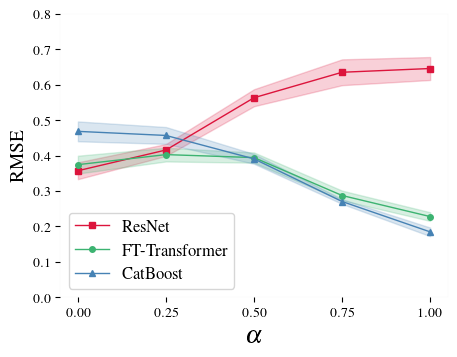

In [67]:
plt.matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.serif': ['Times'],
    'text.usetex': True,
    'pgf.rcfonts': False,
    'axes.linewidth': 0.01,
})

fig, ax = plt.subplots(1,1, dpi=100)
ax.fill_between(
    np.linspace(0,1,5),
    resnet_test_rmse.mean(axis=0) - resnet_test_rmse.std(axis=0), 
    resnet_test_rmse.mean(axis=0) + resnet_test_rmse.std(axis=0), 
    color='crimson', alpha=0.2
)
ax.plot(np.linspace(0,1,5),resnet_test_rmse.mean(axis=0), label="ResNet", c='crimson', marker='s', markersize=4, lw=1)
ax.fill_between(
    np.linspace(0,1,5),
    transformer_test_rmse.mean(axis=0) - transformer_test_rmse.std(axis=0), 
    transformer_test_rmse.mean(axis=0) + transformer_test_rmse.std(axis=0), 
    color='mediumseagreen', alpha=0.2
)
ax.plot(np.linspace(0,1,5),transformer_test_rmse.mean(axis=0), label="FT-Transformer", c='mediumseagreen', marker='o', markersize=4, lw=1)
ax.fill_between(
    np.linspace(0,1,5),
    gbdt_test_rmse.mean(axis=0) - gbdt_test_rmse.std(axis=0), 
    gbdt_test_rmse.mean(axis=0) + gbdt_test_rmse.std(axis=0), 
    color='steelblue', alpha=0.2
)
ax.plot(np.linspace(0,1,5),gbdt_test_rmse.mean(axis=0), label="CatBoost", c='steelblue', marker='^', markersize=4, lw=1)

ax.legend(loc='lower left', fontsize=12)
# plt.grid(which='minor', axis='y')

ax.set_ylabel('RMSE', fontsize=14)
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_xticks(np.linspace(0,1,5))

ax.set_ylim(0,0.8)
fig.set_size_inches(w=5, h=3.75)
fig.show()

if TO_TEX:
    fig.savefig("gbdt_vs_nn.pgf")